In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## import the data and make a dataframe

In [236]:
suicide_data = pd.read_csv('SuicideBD-dataset.csv')
df = suicide_data.copy()
df.set_index('id', inplace=True)
pd.options.display.max_columns = None

In [237]:
df.head(3)

,full_name,age_group,age,gender,profession_group,religion,hometown,latitude,longitude,reason,reason_description,time,method,data_source,suicide_date,unix_time,temperature,feels_like,temp_min,temp_max,air_pressure,air_humidity,wind_speed,wind_deg,clouds_sky,weather_main,weather_description
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Parvez,Teen,22,Male,Worker,Muslim,Brahmanbaria,23.964142,91.118301,Harassment,Assault,afternoon,NaN,https://www.dhakatribune.com/bangladesh/nation...,30/10/20,1604016000,299.15,302.86,299.15,299.15,1008,83,2.10,320,40,Haze,haze
1,Alhaj Uddin,Teen,20,Male,NaN,Muslim,Sylhet,24.894930,91.868706,Relatiohship problem,Failed love relationship,Night,Hanging,https://www.dhakatribune.com/bangladesh/nation...,4/11/2020,1604448000,295.57,299.17,295.57,295.57,1012,96,1.39,116,33,Clouds,scattered clouds
2,Priti Akter,Teen,14,Female,Student,Muslim,Manikganj,23.861650,90.000320,NaN,NaN,Morning,Hanging,https://www.dhakatribune.com/bangladesh/nation...,25/9/20,1600992000,301.15,304.33,301.15,301.15,1004,78,3.60,190,75,Drizzle,drizzle


## data cleaning

In [238]:
# delete any duplicate row?
df = df.drop_duplicates()

remove unnecessary column from dataframe

In [239]:
# delete unnecessary column for analysis
df.drop(['reason_description','data_source','temperature','feels_like','temp_min','temp_max','air_pressure','air_humidity','wind_speed','wind_deg','clouds_sky','weather_description'], axis=1, inplace=True )

In [240]:
df.head()

,full_name,age_group,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,suicide_date,unix_time,weather_main
id,,,,,,,,,,,,,,,
0,Parvez,Teen,22,Male,Worker,Muslim,Brahmanbaria,23.964142,91.118301,Harassment,afternoon,NaN,30/10/20,1604016000,Haze
1,Alhaj Uddin,Teen,20,Male,NaN,Muslim,Sylhet,24.894930,91.868706,Relatiohship problem,Night,Hanging,4/11/2020,1604448000,Clouds
2,Priti Akter,Teen,14,Female,Student,Muslim,Manikganj,23.861650,90.000320,NaN,Morning,Hanging,25/9/20,1600992000,Drizzle
3,Acchia Akhter,NaN,NaN,Female,Student,Muslim,Bogra,24.850980,89.371080,Relatiohship problem,Morning,Hanging,24/9/20,1600905600,Rain
4,Dilshad Nahar,Teen,18,Female,Student,Muslim,Dhaka,23.810331,90.412521,NaN,Night,Hanging,18/9/20,1600387200,Haze


make upper-case

In [241]:
# make all upper case letter to lower for better analysis
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head(5)

/tmp/ipykernel_12799/2985407915.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,full_name,age_group,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,suicide_date,unix_time,weather_main
id,,,,,,,,,,,,,,,
0,parvez,teen,22,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,30/10/20,1604016000,haze
1,alhaj uddin,teen,20,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,4/11/2020,1604448000,clouds
2,priti akter,teen,14,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,25/9/20,1600992000,drizzle
3,acchia akhter,NaN,NaN,female,student,muslim,bogra,24.850980,89.371080,relatiohship problem,morning,hanging,24/9/20,1600905600,rain
4,dilshad nahar,teen,18,female,student,muslim,dhaka,23.810331,90.412521,NaN,night,hanging,18/9/20,1600387200,haze


create new age group

In [242]:
# convert age to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [243]:
# make new age group

bins = [1, 20, 40, 60, 75, 120]
labels = ['teen', 'young_adult', 'middle_age', 'young_old', 'old_old']

df['age_group2'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [244]:
# drop old age group and name age_group2 to age group
df.drop('age_group',axis=1,inplace=True)


In [245]:
df['age_group'] = df['age_group2']

In [246]:
df.drop('age_group2',axis=1,inplace=True)

clean 'profession_group' column

In [247]:
df.head(5)

,full_name,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,suicide_date,unix_time,weather_main,age_group
id,,,,,,,,,,,,,,,
0,parvez,22.0,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,30/10/20,1604016000,haze,young_adult
1,alhaj uddin,20.0,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,4/11/2020,1604448000,clouds,young_adult
2,priti akter,14.0,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,25/9/20,1600992000,drizzle,teen
3,acchia akhter,NaN,female,student,muslim,bogra,24.850980,89.371080,relatiohship problem,morning,hanging,24/9/20,1600905600,rain,NaN
4,dilshad nahar,18.0,female,student,muslim,dhaka,23.810331,90.412521,NaN,night,hanging,18/9/20,1600387200,haze,teen


In [248]:
df['profession_group'].unique()

array(['worker', nan, 'student', 'housewife', 'service holder',
       'day labourer', 'teacher', 'farmer', 'musician', 'saint',
       'day laborer', 'gambler', 'null', 'actor', 'houswife', 'doctor',
       'businessman', 'engineer', 'stportsman', 'spotsman', 'day-laborer'],
      dtype=object)

In [249]:
df['profession_group'] = df['profession_group'].replace(
    {
        'day laborer':'day-laborer',
        'day labourer':'day-laborer',
        'spotsman':'sportsman',
        'stportsman':'sportsman',
        'houswife':'housewife',
    }
)

In [250]:
df['profession_group'].unique()

array(['worker', nan, 'student', 'housewife', 'service holder',
       'day-laborer', 'teacher', 'farmer', 'musician', 'saint', 'gambler',
       'null', 'actor', 'doctor', 'businessman', 'engineer', 'sportsman'],
      dtype=object)

new column from unix_time

In [251]:
df.head(3)

,full_name,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,suicide_date,unix_time,weather_main,age_group
id,,,,,,,,,,,,,,,
0,parvez,22.0,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,30/10/20,1604016000,haze,young_adult
1,alhaj uddin,20.0,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,4/11/2020,1604448000,clouds,young_adult
2,priti akter,14.0,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,25/9/20,1600992000,drizzle,teen


In [252]:
df['time_stamp'] = pd.to_datetime(df['unix_time'], unit='s')

In [253]:
df.drop(['suicide_date','unix_time'],axis=1,inplace=True)

In [254]:
df.rename(columns={'time_stamp':'suicide_date'},inplace=True)

In [255]:
df.head()

,full_name,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,weather_main,age_group,suicide_date
id,,,,,,,,,,,,,,
0,parvez,22.0,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,haze,young_adult,2020-10-30
1,alhaj uddin,20.0,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,clouds,young_adult,2020-11-04
2,priti akter,14.0,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,drizzle,teen,2020-09-25
3,acchia akhter,NaN,female,student,muslim,bogra,24.850980,89.371080,relatiohship problem,morning,hanging,rain,NaN,2020-09-24
4,dilshad nahar,18.0,female,student,muslim,dhaka,23.810331,90.412521,NaN,night,hanging,haze,teen,2020-09-18


In [256]:
df2 = df.copy()

## Analysis & Visualization

### Demographic Analysis

In [257]:
# Age group Analysis
Age_Group = df2['age_group'].value_counts().reset_index()
Age_Group = pd.DataFrame(Age_Group, columns=['age_group','count'])
Age_Group

,age_group,count
0,young_adult,285
1,teen,247
2,middle_age,82
3,young_old,30
4,old_old,5


In [258]:
# visualize with plotly
fig = px.bar(Age_Group, x='age_group', y='count', 
             title='Age Group Distribution', 
             color='age_group',
             labels={'age_group': 'Age Group', 'count': 'Count'},
             template='plotly_dark')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

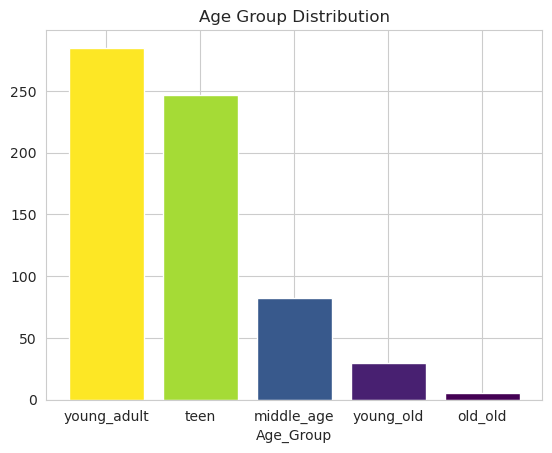

In [259]:
# visualize with mathplotlib
cmap = plt.get_cmap('viridis')
normalize = plt.Normalize(min(Age_Group['count']), max(Age_Group['count']))
colors = cmap(normalize(Age_Group['count']))

plt.bar(Age_Group['age_group'],Age_Group['count'],color = colors)
plt.xlabel('Age_Group')
plt.title('Age Group Distribution')

plt.show

### Distribution by Gender

In [260]:
Gender = df2['gender'].value_counts().reset_index()
Gender = pd.DataFrame(Gender, columns=['gender','count'])
Gender

,gender,count
0,female,417
1,male,341
2,3rd gender,1


In [261]:
# visualize with plotly
fig = px.pie(Gender, values='count', names='gender',
             title= 'Distribution by Gender',
             template='plotly_dark'
)
fig.show()

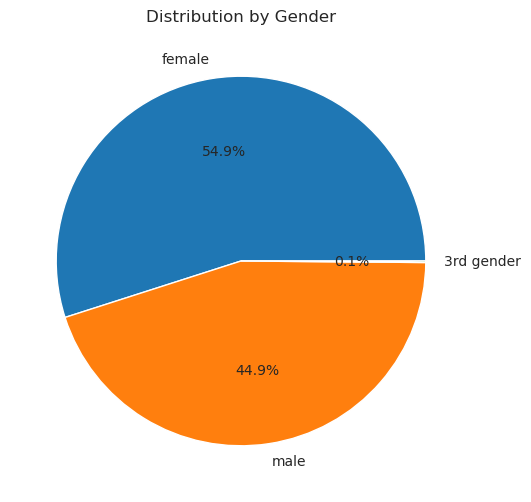

In [262]:
# visualization with seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(Gender['count'], labels=Gender['gender'], autopct='%1.1f%%')
plt.title('Distribution by Gender')
plt.show()

### Distribution by Religion

In [263]:
Religion = df['religion'].value_counts().reset_index()
Religion = pd.DataFrame(Religion, columns=['religion','count'])
Religion

,religion,count
0,muslim,646
1,hindu,82
2,christian,5
3,buddhism,1


In [264]:
# visualize with plotly
fig = px.pie(Religion, values='count', names='religion',
             title= 'Distribution by Religion',
             template='plotly_dark'
)
fig.show()

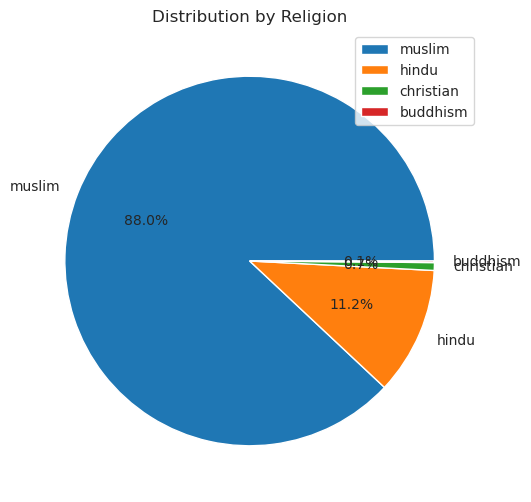

In [265]:
# visualization with seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(Religion['count'], labels=Religion['religion'], autopct='%1.1f%%')
plt.title('Distribution by Religion')
plt.legend()
plt.show()

## Temporal Trends

### monthly Trends

In [266]:
a = df2['suicide_date'].min()
b = df2['suicide_date'].max()
print(f'start date: {a}')
print(f'end date:   {b}')

start date: 2020-05-04 00:00:00
end date:   2021-05-02 00:00:00


In [267]:
df2['year'] = df2['suicide_date'].dt.year
df2['month'] = df2['suicide_date'].dt.month


In [268]:
yearly_trend = df2['year'].value_counts()
yearly_trend

year
2020    743
2021     16
Name: count, dtype: int64

In [269]:
month_map = {
    1:'jan',
    2:'feb',
    3:'mar',
    4:'apr',
    5:'may',
    6:'jun',
    7:'jul',
    8:'aug',
    9:'sep',
    10:'oct',
    11:'nov',
    12:'dec'
}
df2['month'] = df2['month'].map(month_map)

In [270]:
df2.head()

,full_name,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,weather_main,age_group,suicide_date,year,month
id,,,,,,,,,,,,,,,,
0,parvez,22.0,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,haze,young_adult,2020-10-30,2020,oct
1,alhaj uddin,20.0,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,clouds,young_adult,2020-11-04,2020,nov
2,priti akter,14.0,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,drizzle,teen,2020-09-25,2020,sep
3,acchia akhter,NaN,female,student,muslim,bogra,24.850980,89.371080,relatiohship problem,morning,hanging,rain,NaN,2020-09-24,2020,sep
4,dilshad nahar,18.0,female,student,muslim,dhaka,23.810331,90.412521,NaN,night,hanging,haze,teen,2020-09-18,2020,sep


In [271]:
month_trend = df2['month'].value_counts().reset_index()
month_trend = pd.DataFrame(month_trend)
month_trend

,month,count
0,jul,133
1,jun,127
2,aug,121
3,sep,105
4,oct,98
5,may,84
6,nov,76
7,apr,15


In [272]:
fig = px.bar(month_trend, x='month', y='count',
             title='Monthly trend',
             color='month',
             template='plotly_dark')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

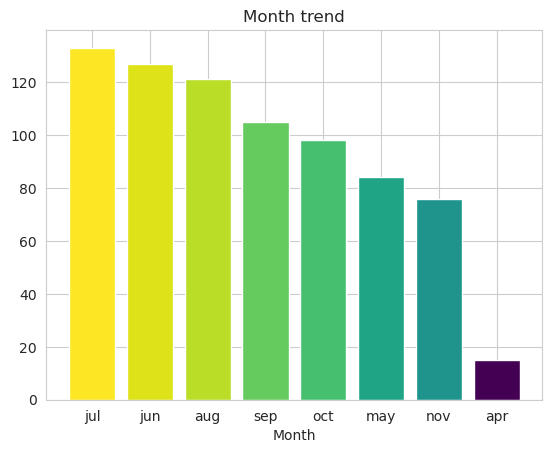

In [273]:
# visualize with mathplotlib
cmap = plt.get_cmap('viridis')
normalize = plt.Normalize(min(month_trend['count']), max(month_trend['count']))
colors = cmap(normalize(month_trend['count']))

plt.bar(month_trend['month'],month_trend['count'],color = colors)
plt.xlabel('Month')
plt.title('Month trend')

plt.show

## Geographical Analysis


In [274]:
df2['hometown'] = df['hometown'].apply(lambda x: x.split(',')[-1].strip())

In [275]:
hometown = df2['hometown'].value_counts().reset_index()
hometown = pd.DataFrame(hometown)
hometown

,hometown,count
0,rajshahi,29
1,dhaka,26
2,mymensingh,23
3,pabna,19
4,comilla,19
...,...,...
136,kulaura,1
137,brahmanbari,1
138,monirampur,1
139,nator,1


In [276]:
fig = px.bar(hometown, x='hometown', y='count',
             color='hometown',
             title='Hometown Distribution',
             template='plotly_dark')
fig.show()

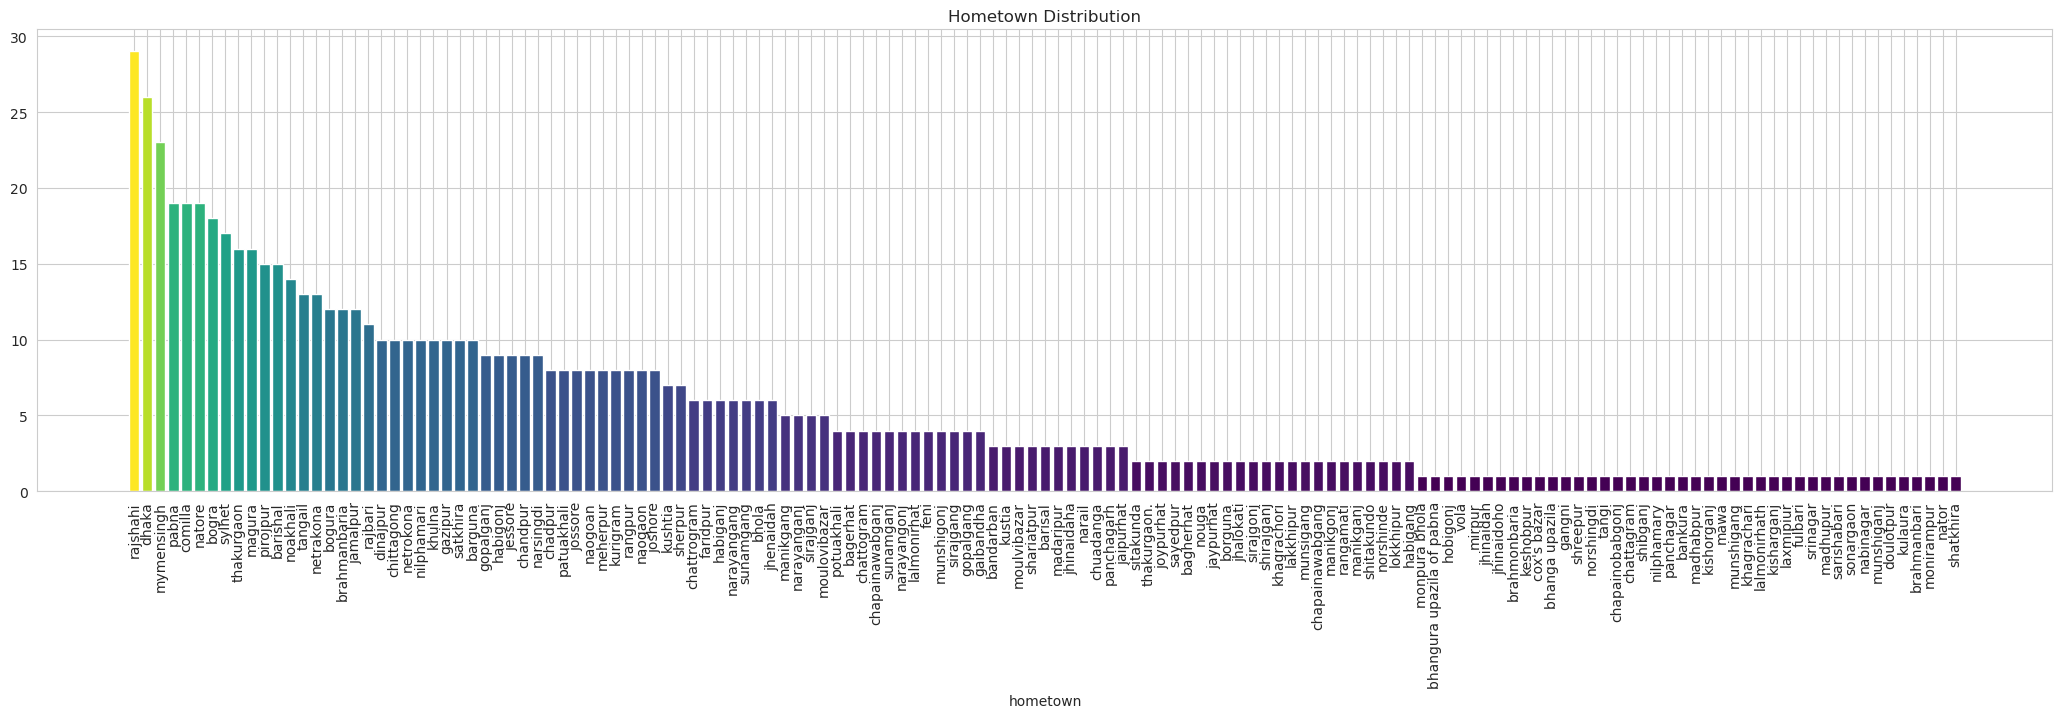

In [338]:
# visualize with mathplotlib
cmap = plt.get_cmap('viridis')
normalize = plt.Normalize(min(hometown['count']), max(hometown['count']))
colors = cmap(normalize(hometown['count']))

plt.figure(figsize=(26,6))
plt.bar(hometown['hometown'],hometown['count'],color = colors)
plt.xlabel('hometown')
plt.xticks(rotation=90)
plt.title('Hometown Distribution')

plt.show()

In [277]:
hometown['latitude'] = df2['latitude']
hometown['longitude'] = df2['longitude']

## Profession Analysis

In [278]:
pro = df2['profession_group'].value_counts().reset_index()
pro = pd.DataFrame(pro)
pro

,profession_group,count
0,student,244
1,housewife,149
2,null,75
3,worker,44
4,service holder,42
5,day-laborer,21
6,businessman,12
7,farmer,8
8,teacher,7
9,doctor,3


In [279]:
fig = px.bar(pro, x='profession_group',y='count',
             color='profession_group',
             title='Profession_group Distribution',
             template='plotly_dark')
fig.show()

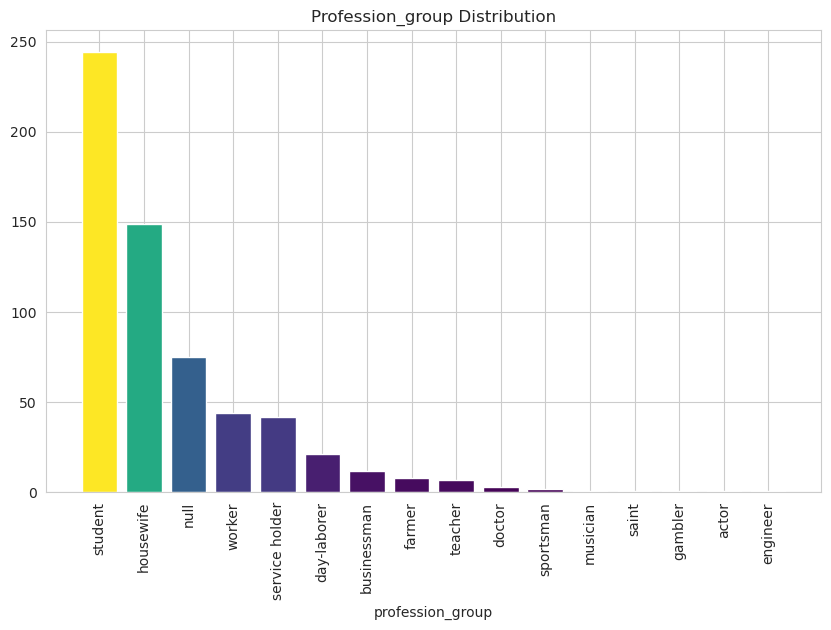

In [340]:
# visualize with mathplotlib
cmap = plt.get_cmap('viridis')
normalize = plt.Normalize(min(pro['count']), max(pro['count']))
colors = cmap(normalize(pro['count']))

plt.figure(figsize=(10,6))
plt.bar(pro['profession_group'],pro['count'],color = colors)
plt.xlabel('profession_group')
plt.xticks(rotation=90)
plt.title('Profession_group Distribution')

plt.show()

## method Analysis

In [300]:
df2.head()

,full_name,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,weather_main,age_group,suicide_date,year,month
id,,,,,,,,,,,,,,,,
0,parvez,22.0,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,haze,young_adult,2020-10-30,2020,oct
1,alhaj uddin,20.0,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,clouds,young_adult,2020-11-04,2020,nov
2,priti akter,14.0,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,drizzle,teen,2020-09-25,2020,sep
3,acchia akhter,NaN,female,student,muslim,bogra,24.850980,89.371080,relatiohship problem,morning,hanging,rain,NaN,2020-09-24,2020,sep
4,dilshad nahar,18.0,female,student,muslim,dhaka,23.810331,90.412521,NaN,night,hanging,haze,teen,2020-09-18,2020,sep


In [ ]:
Method = df2['method'].value_counts().reset_index()
Method = pd.DataFrame(Method)
Method

In [302]:
Method['method'] = Method['method'].apply(lambda x: 'train' if pd.notna(x) and 'train' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'train' if pd.notna(x) and 'rail' in str(x) else x)

In [303]:
Method['method'] = Method['method'].apply(lambda x: 'jumping from height' if pd.notna(x) and 'jump' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'rat kiling substance' if pd.notna(x) and 'rat' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'took poison' if pd.notna(x) and 'pois' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'took pesticide' if pd.notna(x) and 'pest' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'took gas tablet' if pd.notna(x) and 'gas' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'took toxic tablet' if pd.notna(x) and 'eaten tablets' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'took toxic tablet' if pd.notna(x) and 'taking toxic tablet' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'took harpic' if pd.notna(x) and 'harpic' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'cutting neck' if pd.notna(x) and 'cut' in str(x) else x)
Method['method'] = Method['method'].apply(lambda x: 'sleeping pills' if pd.notna(x) and 'sleep' in str(x) else x)


In [325]:
Method_df = Method.groupby('method', as_index=False)['count'].sum()

In [328]:
Method_sort = Method_df.sort_values(by='count', ascending=False)

In [329]:
# plotly visualization
fig =fig = px.bar(Method_sort, x='method',y='count',
             color='method',
             title='Method used for Suicide',
             template='plotly_dark')
fig.show()

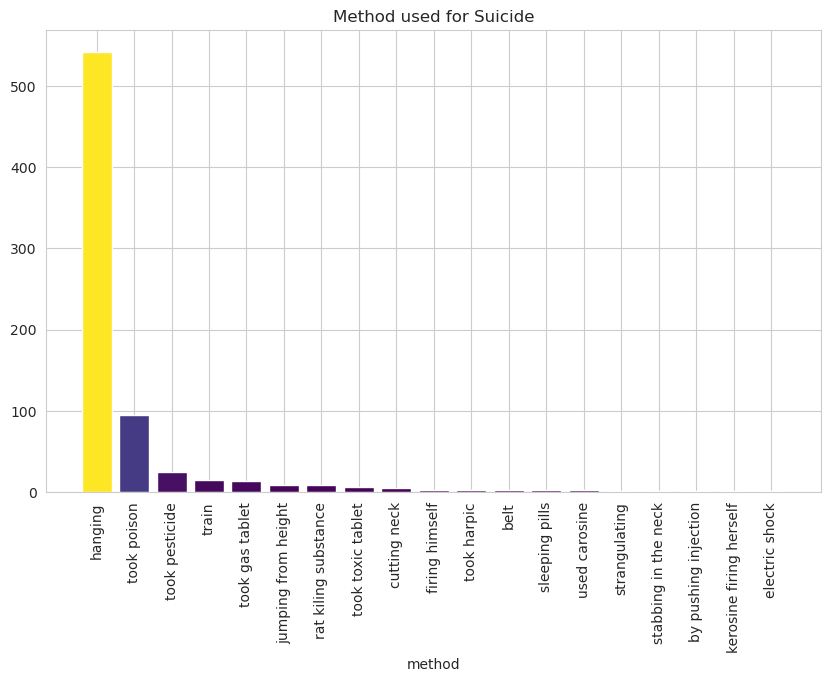

In [341]:
# visualize with mathplotlib
cmap = plt.get_cmap('viridis')
normalize = plt.Normalize(min(Method_sort['count']), max(Method_sort['count']))
colors = cmap(normalize(Method_sort['count']))

plt.figure(figsize=(10,6))
plt.bar(Method_sort['method'],Method_sort['count'],color = colors)
plt.xlabel('method')
plt.xticks(rotation=90)
plt.title('Method used for Suicide')

plt.show()